In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import l1_min_c
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from statistics import stdev
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mujahidashraf/data/refs/heads/main/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
df[['Age']] = imputer.fit_transform(df[['Age']])
imputer1 = SimpleImputer(strategy='most_frequent')  # You can also use 'median' or 'most_frequent'
df[['Embarked']] = imputer1.fit_transform(df[['Embarked']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df=df.drop(columns=['PassengerId',	'Name','Cabin',		'Ticket'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Pclass'] = le.fit_transform(df['Pclass'])

#df = pd.get_dummies(df, columns=['Sex', 'Embarked','Pclass'])
#print(len(df))
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.0,1,0,7.2500,2
1,1,0,0,38.0,1,0,71.2833,0
2,1,2,0,26.0,0,0,7.9250,2
3,1,0,0,35.0,1,0,53.1000,2
4,0,2,1,35.0,0,0,8.0500,2


In [ ]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [ ]:
pipeline_gnb = Pipeline([
    ('scaler', StandardScaler()),
    ('gnb', GaussianNB())
])

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=500))
])

pipeline_tree = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='gini',
        max_depth=3,
        min_samples_leaf=2,
        min_samples_split=2,
        random_state=42))
])

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=1, kernel='rbf', degree=3, gamma='scale', probability=True))  # Enable probability for soft voting
])

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Not necessary for RandomForest but included for consistency
    ('rf', RandomForestClassifier(random_state=42))
])

# Voting Classifier with all pipelines
Stacking_clf = StackingClassifier(estimators=[
    ('gnb', pipeline_gnb),
    ('knn', pipeline_knn),
    ('logreg', pipeline_logreg),
    ('tree', pipeline_tree),
    ('svm', pipeline_svm),
    ('rf', pipeline_rf)],
                                  final_estimator=pipeline_tree,
                                  cv=5

                          )

# Train the ensemble
Stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('gnb',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('gnb', GaussianNB())])),
                               ('knn',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('knn',
                                                 KNeighborsClassifier())])),
                               ('logreg',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('logreg',
                                                 LogisticRegression(max_iter=500))])),
                               ('tree',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                (...
                                                                        random_state=42))])),
                               ('svm',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('svm',
                                                 SVC(C=1, probability=True))])),
                               ('rf',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('rf',
                                                 RandomForestClassifier(random_state=42))]))],
                   final_estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                                   ('tree',
                                                    DecisionTreeClassifier(max_depth=3,
                                                                           min_samples_leaf=2,
                                                                           random_state=42))]))

In [ ]:
for name, clf in Stacking_clf.named_estimators_.items():
  print(name, "=", clf.score(X_test, y_test))

gnb = 0.8022388059701493
knn = 0.8134328358208955
logreg = 0.8097014925373134
tree = 0.8171641791044776
svm = 0.832089552238806
rf = 0.8022388059701493


In [ ]:
Stacking_clf.score(X_test, y_test)

0.835820895522388

In [ ]:
y_pred = Stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Voting Classifier Accuracy: 0.8358
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       174
           1       0.78      0.73      0.76        94

    accuracy                           0.84       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.83      0.84      0.83       268



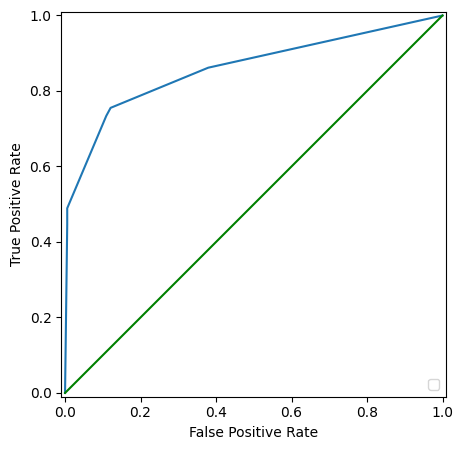

In [ ]:
y_proba = Stacking_clf.predict_proba(X_test)

def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
plot_auc_roc_curve(y_test, y_proba[:, 1])

In [ ]:
score = cross_val_score(Stacking_clf, X_train, y_train, cv=3, scoring='accuracy', error_score="raise")
SC_cv_score = score.mean()
SC_cv_stdev = stdev(score)
print('Cross Validation accuracy scores are: {}'.format(score))
print('Average Cross Validation accuracy score: ', SC_cv_score)
print('Cross Validation accuracy standard deviation: ', SC_cv_stdev)

Cross Validation accuracy scores are: [0.83653846 0.76442308 0.83091787]
Average Cross Validation accuracy score:  0.8106264709525579
Cross Validation accuracy standard deviation:  0.04011188059464096
